In [1]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import seaborn as sns

In [2]:
shots = pd.read_csv('data/shots.csv')
shots.loc[:, 'freeze_frame'] = shots.loc[:, 'freeze_frame'].apply(ast.literal_eval)
shots.head()

,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,open_goal,statsbomb_xg,type,technique,body_part,outcome,freeze_frame
0,Regular Play,Right Wing,0,95.9,58.9,0,0,0,0.013642,Open Play,Normal,Left Foot,Saved,"[{'freeze_frame': [{'location': [119.6, 42.3],..."
1,From Free Kick,Center Forward,0,106.1,54.3,0,0,0,0.040844,Open Play,Normal,Right Foot,Off T,"[{'freeze_frame': [{'location': [118.8, 43.2],..."
2,From Free Kick,Left Wing,1,110.0,28.2,0,0,0,0.136871,Open Play,Normal,Left Foot,Saved,"[{'freeze_frame': [{'location': [111.3, 39.8],..."
3,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,0,0.124624,Open Play,Normal,Head,Post,"[{'freeze_frame': [{'location': [105.8, 46.6],..."
4,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,0,0.023807,Open Play,Normal,Left Foot,Post,"[{'freeze_frame': [{'location': [97.8, 49.4], ..."


In [3]:
shots = shots.rename(columns = {'outcome': 'outcome_type'})
shots.loc[:, 'outcome'] = shots.loc[:, 'outcome_type'].apply(lambda x: 1 if x == 'Goal' else 0)
shots.head()

,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,open_goal,statsbomb_xg,type,technique,body_part,outcome_type,freeze_frame,outcome
0,Regular Play,Right Wing,0,95.9,58.9,0,0,0,0.013642,Open Play,Normal,Left Foot,Saved,"[{'freeze_frame': [{'location': [119.6, 42.3],...",0
1,From Free Kick,Center Forward,0,106.1,54.3,0,0,0,0.040844,Open Play,Normal,Right Foot,Off T,"[{'freeze_frame': [{'location': [118.8, 43.2],...",0
2,From Free Kick,Left Wing,1,110.0,28.2,0,0,0,0.136871,Open Play,Normal,Left Foot,Saved,"[{'freeze_frame': [{'location': [111.3, 39.8],...",0
3,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,0,0.124624,Open Play,Normal,Head,Post,"[{'freeze_frame': [{'location': [105.8, 46.6],...",0
4,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,0,0.023807,Open Play,Normal,Left Foot,Post,"[{'freeze_frame': [{'location': [97.8, 49.4], ...",0


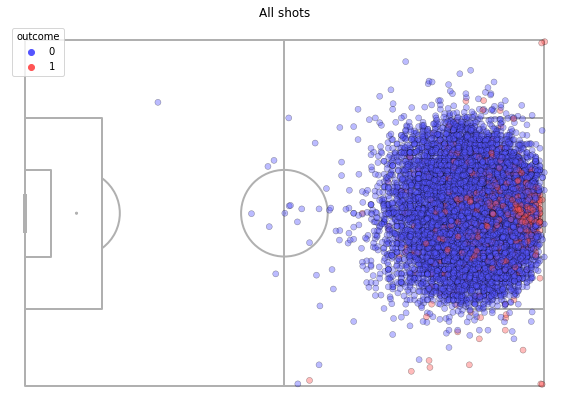

In [4]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = shots, x = 'x_start', y = 'y_start', ax = ax,
                hue = 'outcome', palette = 'seismic', edgecolor = 'black', alpha = 0.4)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [5]:
shots.loc[:, 'type'].unique()

array(['Open Play', 'Free Kick', 'Penalty', 'Corner', 'Kick Off'],
      dtype=object)

In [6]:
# only leave 'Open Play' shots (that are not directly from Free Kick, Corner, Penalty, Kick Off)
shots = shots.loc[shots.loc[:, 'type'] == 'Open Play', :]

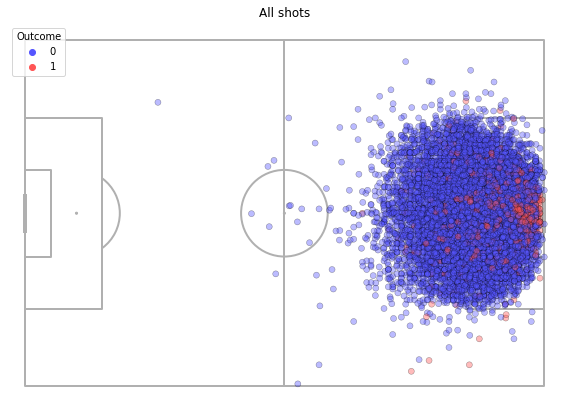

In [31]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = shots, x = 'x_start', y = 'y_start', ax = ax,
                hue = 'outcome', palette = 'seismic', edgecolor = 'black', alpha = 0.4)



#hexmap = pitch.hexbin(shots.x_start, shots.y_start, ax=ax, edgecolors='#f4f4f4', cmap='summer', gridsize = 50)

ax.legend(title = 'Outcome', frameon = True, loc = 'upper left')
ax.set_title('All shots')
plt.show()

**Adding distance and angle features**

In [128]:
# Distance Feature calculation

# define goal center for 'statsbomb'
goal_center = np.array([120, 40])

# calculate distance between shot and goal center
shots['distance'] = np.sqrt((shots['x_start'] - goal_center[0])**2 + (shots['y_start'] - goal_center[1])**2)
shots['distance'] = shots['distance'].round(decimals = 2)

In [129]:
# Angle Feature calculation

# transform x, y coordinates from percentiles to field length coordinates (105 meters x 68 meters)
x = shots['x_start'] * 105/120
y = shots['y_start'] * 68/80 

# Use trigonometric formula to find angle between two sides (a,b ) of triangle where third side (c) 
# is a goal line of length 7.32
a = np.sqrt((x - 105)**2 + (y - 30.34)**2) # length between right post and (x,y) shot coordinate
b = np.sqrt((x - 105)**2 + (y - 37.66)**2) # length between left post and (x,y) shot coordinate
c = 7.32 # goal line length
cos_alpha = (a**2 + b**2 - c**2)/(2*a*b)
cos_alpha = np.round(cos_alpha, decimals = 4)

# remember to leave angle in radians (if you want to transfer to degree multiply cos_alpha by 180/pi)
shots['angle'] = np.arccos(cos_alpha)

In [130]:
shots.head()

,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,open_goal,statsbomb_xg,type,technique,body_part,outcome_type,freeze_frame,outcome,distance,angle
0,Regular Play,Right Wing,0,95.9,58.9,0,0,0,0.013642,Open Play,Normal,Left Foot,Saved,"[{'freeze_frame': [{'location': [119.6, 42.3],...",0,30.63,0.220446
1,From Free Kick,Center Forward,0,106.1,54.3,0,0,0,0.040844,Open Play,Normal,Right Foot,Off T,"[{'freeze_frame': [{'location': [118.8, 43.2],...",0,19.94,0.305489
2,From Free Kick,Left Wing,1,110.0,28.2,0,0,0,0.136871,Open Play,Normal,Left Foot,Saved,"[{'freeze_frame': [{'location': [111.3, 39.8],...",0,15.47,0.372831
3,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,0,0.124624,Open Play,Normal,Head,Post,"[{'freeze_frame': [{'location': [105.8, 46.6],...",0,6.81,1.100781
4,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,0,0.023807,Open Play,Normal,Left Foot,Post,"[{'freeze_frame': [{'location': [97.8, 49.4], ...",0,24.80,0.334118


**Testing Model**

In [549]:
from sklearn.model_selection import train_test_split
# Prepare features and labels from available data
X = shots.loc[:, ['play_pattern_name','under_pressure', 'distance', 'angle',
                   'follows_dribble', 'first_time', 'open_goal', 'technique', 'body_part']]
y = shots.loc[:, 'outcome']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [550]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

column_trans = ColumnTransformer(
    [('encode_bodyparts', OneHotEncoder(dtype='int'), ['play_pattern_name', 'technique', 'body_part']),
    ('std_coords', StandardScaler(), ['distance', 'angle'])],
    remainder = 'passthrough', verbose_feature_names_out = True)

X_train_trans = column_trans.fit_transform(X_train)

**Logistic Regression**

In [551]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
# Fit Logistic Regression Model
xG_model = LogisticRegression(penalty = 'none')
xG_model.fit(X_train_trans, y_train)

# evaluate
xG_predictions = xG_model.predict_proba(X_train_trans)[:, 1]
roc_auc_score(y_train, xG_predictions)

0.7771447260914229

In [552]:
X_valid_trans = column_trans.transform(X_valid)
xG_predictions = xG_model.predict_proba(X_valid_trans)[:, 1]
roc_auc_score(y_valid, xG_predictions)

0.8058029740398769

In [553]:
brier_score_loss(y_valid, xG_predictions)

0.07233745088213378

**Gradient Boosting**

In [538]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 150, learning_rate = 0.8,
    random_state=0).fit(X_train_trans, y_train)

xG_predictions = clf.predict_proba(X_train_trans)[:, 1]
roc_auc_score(y_train, xG_predictions)

0.7988210383145468

In [536]:
X_valid_trans = column_trans.transform(X_valid)
xG_predictions = clf.predict_proba(X_valid_trans)[:, 1]
roc_auc_score(y_valid, xG_predictions)

0.7985915964137562

In [539]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_train, xG_predictions)

0.2447383000979064